In [45]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [21]:
train_path = './dataset/train'
test_path = './dataset/test'

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_path, target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_path, target_size=(224,224))
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [22]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(input = vggmodel.input, output = predictions)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [23]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')

model_final.fit_generator(generator= traindata, steps_per_epoch= 2, epochs= 100, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])
model_final.save_weights("vgg16_1.h5")

Epoch 1/100
2/2 [==============================] - 9s 5s/step - loss: 0.6529 - acc: 0.7500
Epoch 2/100


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


2/2 [==============================] - 5s 3s/step - loss: 0.6429 - acc: 0.7969
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 0.2973 - acc: 0.8594
Epoch 4/100
2/2 [==============================] - 5s 2s/step - loss: 0.2535 - acc: 0.9219
Epoch 5/100
2/2 [==============================] - 5s 2s/step - loss: 0.2990 - acc: 0.8750
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 0.1130 - acc: 0.9531
Epoch 7/100
2/2 [==============================] - 5s 2s/step - loss: 0.2018 - acc: 0.9531
Epoch 8/100
2/2 [==============================] - 5s 2s/step - loss: 0.1347 - acc: 0.9688
Epoch 9/100
2/2 [==============================] - 5s 3s/step - loss: 0.1390 - acc: 0.9375
Epoch 10/100
2/2 [==============================] - 5s 2s/step - loss: 0.2532 - acc: 0.9062
Epoch 11/100
2/2 [==============================] - 5s 2s/step - loss: 0.1798 - acc: 0.9531
Epoch 12/100
2/2 [==============================] - 5s 2s/step - loss: 0.1979 - acc: 0.9062
Epoch 13

2/2 [==============================] - 5s 2s/step - loss: 0.1007 - acc: 0.9844
Epoch 92/100
2/2 [==============================] - 5s 2s/step - loss: 0.0345 - acc: 0.9844
Epoch 93/100
2/2 [==============================] - 5s 2s/step - loss: 0.3239 - acc: 0.8906
Epoch 94/100
2/2 [==============================] - 5s 2s/step - loss: 0.0522 - acc: 0.9531
Epoch 95/100
2/2 [==============================] - 5s 2s/step - loss: 0.3754 - acc: 0.9062
Epoch 96/100
2/2 [==============================] - 5s 2s/step - loss: 0.1126 - acc: 0.9688
Epoch 97/100
2/2 [==============================] - 5s 2s/step - loss: 0.1155 - acc: 0.9219
Epoch 98/100
2/2 [==============================] - 5s 2s/step - loss: 0.0097 - acc: 1.0000
Epoch 99/100
2/2 [==============================] - 5s 2s/step - loss: 0.2975 - acc: 0.8906
Epoch 100/100
2/2 [==============================] - 5s 2s/step - loss: 0.1871 - acc: 0.9219


In [25]:
!ls vgg16_1.h5 # 학습 모델 저장

vgg16_1.h5


In [51]:
import pandas as pd
import os
import numpy as np

test_dataset = os.listdir("./dataset/test1")
df=pd.DataFrame({'id':[i for i in range(len(test_dataset))], 'label':[0 for i in range(len(test_dataset))]})

pd.options.mode.chained_assignment = None  # default='warn'

# 전체 테스트셋 중 30개만 분류
for e,i in enumerate(test_dataset[:30]):
    print(i)
    output=[]
    img = image.load_img(os.path.join("./dataset/test1",i),target_size=(224,224))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = model_final.predict(img)
#     print(output)
    if output[0][0] > output[0][1]:
#         print("cat")
        df["id"][e]=i
        df["label"][e]="cat"
    else:
#         print('dog')
        df["id"][e]=i
        df["label"][e]="dog"

1926.jpg
9950.jpg
8968.jpg
8819.jpg
1863.jpg
5293.jpg
3552.jpg
486.jpg
1574.jpg
11946.jpg
1934.jpg
2537.jpg
9521.jpg
2753.jpg
7709.jpg
3396.jpg
7672.jpg
10226.jpg
4643.jpg
10453.jpg
9025.jpg
10171.jpg
3473.jpg
1807.jpg
394.jpg
6858.jpg
8237.jpg
1498.jpg
6567.jpg
3196.jpg


In [52]:
df.iloc[:30]

,id,label
0,1926.jpg,cat
1,9950.jpg,cat
2,8968.jpg,dog
3,8819.jpg,dog
4,1863.jpg,dog
5,5293.jpg,dog
6,3552.jpg,dog
7,486.jpg,dog
8,1574.jpg,dog
9,11946.jpg,dog


cat


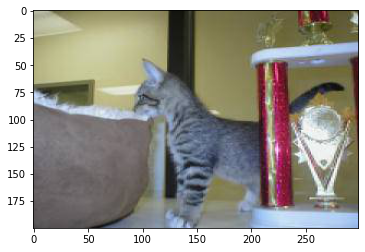

cat


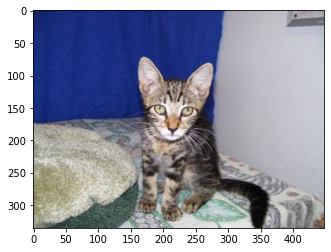

dog


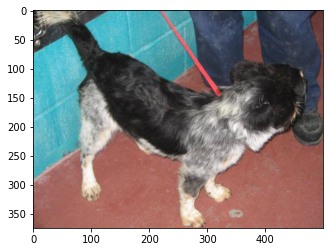

dog


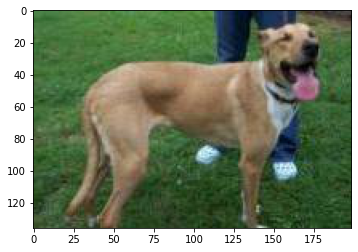

dog


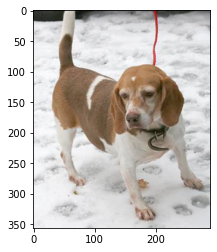

dog


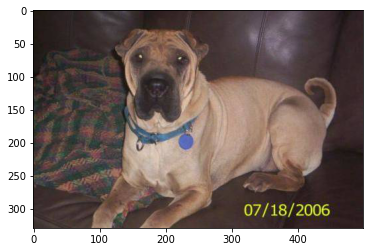

dog


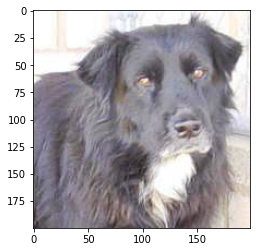

dog


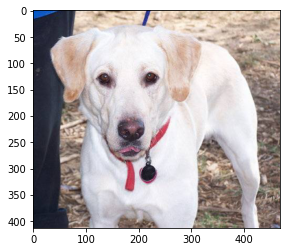

dog


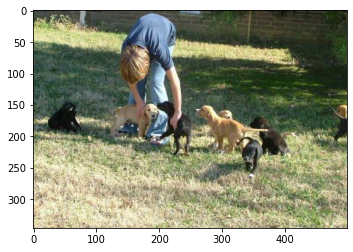

dog


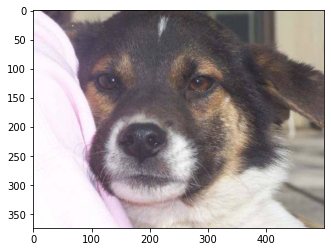

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(10):
    img = df.iloc[i]['id']
    label = df.iloc[i]['label'] 
    print(label)
    image_show = mpimg.imread(os.path.join('./dataset/test1/', img))
    plt.imshow(image_show)
    plt.show()